<a href="https://colab.research.google.com/github/thisisbhupendrasingh/Transformers/blob/main/Keras_Tensorflow_CIFAR10_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project created by me - Bhupendra Pratap Sngh
### Subscribe to my youtube channel: https://www.youtube.com/@dsbybs
# CIFAR10 Image Classification using Keras/Tensorflow.ipynb

Keras is a high-level API that runs on top of TensorFlow (Google's ML framework), making it super intuitive for building models—think declarative style where you stack layers like LEGO bricks.

It's great for beginners because it's less code-heavy than raw TensorFlow and handles a lot automatically (e.g., no manual loops for training).

## Step:1 Libraries import

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Check GPU availability for running processes
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Step:2 Load and preprocessing the data

In [2]:
# load data

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels (10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}')
print(f'Train shape: {x_train.shape}, Labels shape: {y_train.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: 50000, Test samples: 10000
Train shape: (50000, 32, 32, 3), Labels shape: (50000, 10)


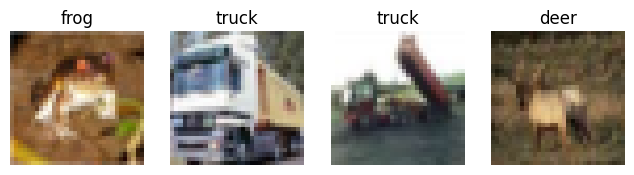

In [3]:
# Ploting first 5 images for checking the samples
plt.figure(figsize=(10, 3))
for i in range(4):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f'{classes[np.argmax(y_train[i])]}')
    plt.axis('off')
plt.show()

## Step 3: Define the CNN Model

In [4]:
# will create a function to initializa and load the model
def create_model():
    model = models.Sequential([
        # Conv Block 1
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        # Conv Block 2
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Conv Block 3
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten and Dense
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # using softmax for multi classes: 10 classes
    ])

    model.compile(
        optimizer='adam',  # Adam optimizer
        loss='categorical_crossentropy',  # For multi-class
        metrics=['accuracy']
    )

    return model

# Build model
model = create_model()
model.summary()  # will print the layer details

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,034 (1.38 MB)

 Trainable params: 361,034 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Data Augmentation and Model Training

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation for training
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the generator on training data
datagen.fit(x_train)

# Train (10 epochs, batch 128)
# It'll show progress per epoch with loss/accuracy.
# No manual loops—Keras does the heavy lifting!
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=len(x_train) // 128,
    epochs=10,
    validation_data=(x_test, y_test)
)

print('Training finished!')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.2692 - loss: 1.9368 - val_accuracy: 0.4977 - val_loss: 1.3873
Epoch 2/10
  1/390 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4453 - loss: 1.4195

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4453 - loss: 1.4195 - val_accuracy: 0.4833 - val_loss: 1.4213
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.4726 - loss: 1.4554 - val_accuracy: 0.5669 - val_loss: 1.2216
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5078 - loss: 1.3476 - val_accuracy: 0.5567 - val_loss: 1.2695
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.5411 - loss: 1.2813 - val_accuracy: 0.5972 - val_loss: 1.1103
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5859 - loss: 1.1364 - val_accuracy: 0.6074 - val_loss: 1.0841
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.5838 - loss: 1.1767 - val_accuracy: 0.6428 - val_loss: 1.0144
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.9415 - val_accuracy: 0.6410 - val_loss: 1.0136
Epoch 9/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.6058 - loss: 1.1076 - val_accuracy: 0.639

## Step 5: Model Evaluation on Test Set

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 1.009, Test Accuracy: 0.64%


## Step 6: Visualization of Test Results

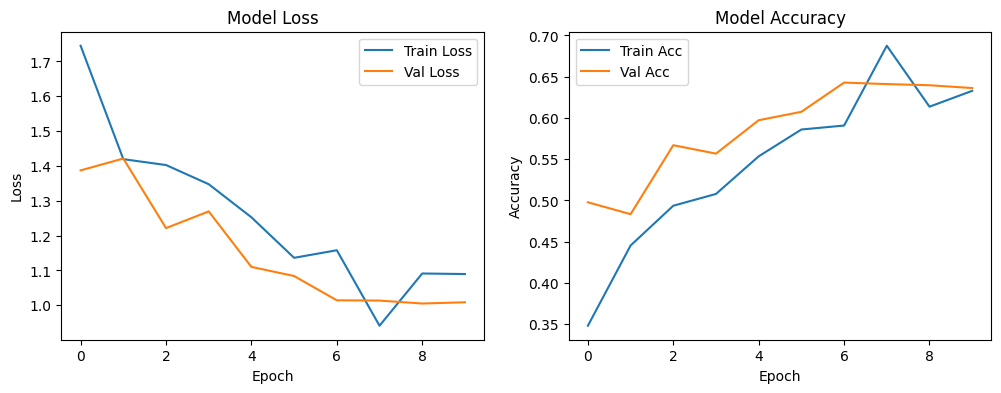

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


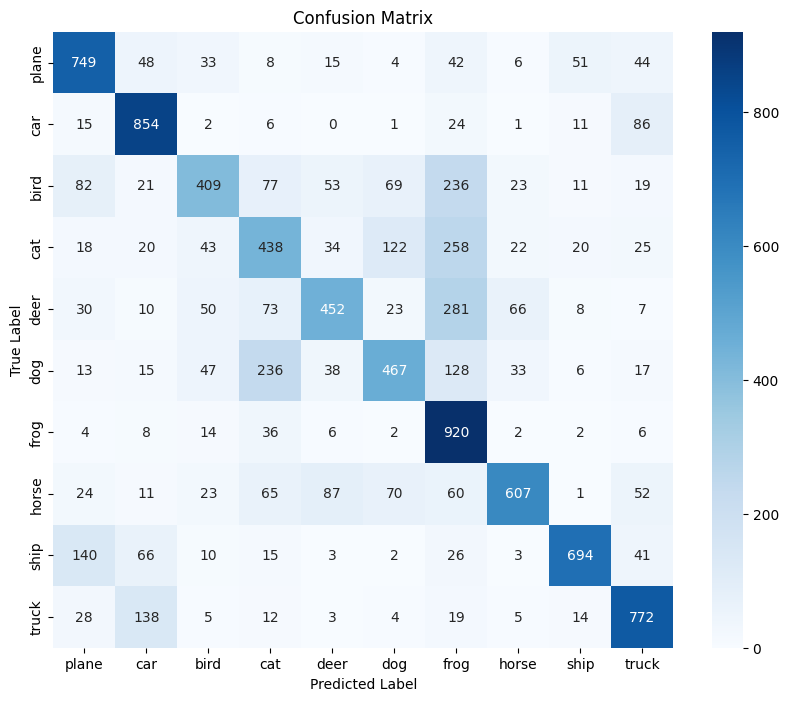

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

# Loss Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix (bonus)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()